In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'

path_data = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_20micros_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - no GM1

name = '_DPPC_DIPC_chol_352'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

In [3]:
# load gro and xtc files
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all and resname DPPC")

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 4840
number of lipids in the upper leaflet: 2420 + number of lipids in the lower leaflet:2420 
= 4840


In [8]:
time_simu = 20 # microseconds
nb_frames_simu = 20000

tmes = 10
start = 5000
nb_bin = 10 # 20 ?

In [9]:
# boucle pour calculer la distribution de compo au cours du temps

nb_rate = np.zeros(nb_bin+1)
rate = np.arange(nb_bin+1)/nb_bin + 1/2/nb_bin

for ts in u.trajectory:
     if (ts.frame%tmes == 0 and ts.frame>=start):
            print(ts.frame)

            patch = u.select_atoms(sel_tot).positions
            
            xmax = max(patch[:,0])
            ymax = max(patch[:,1])
            
            xmin = min(patch[:,0])
            ymin = min(patch[:,1])
            
            N = 15
            dx = (xmax-xmin)/N
            dy = (ymax-ymin)/N
           
                    
            # upper leaflet
            bary0 = []

            Mphi0_Lo = np.zeros((N,N))

            for i in range(0,N):
                xs = xmin + i*dx
                for j in range(0,N):
                    ys = ymin + j*dy

                    # barycenter of all molecules in each box
                    sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
                    b0=leaflet0.select_atoms(sel).centroid().tolist()
                    bary0.append(b0)

                    # composition rates in each box
                    
                    # PC composition rates in each box
                    sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
                    tot0PC= leaflet0.select_atoms(sel_totPC).positions
                    n_tot0PC=len(tot0PC) # total number of PC

                    sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
                    Lo0=leaflet0.select_atoms(sel_Lo).positions
                    n_Lo0=len(Lo0) # number of molecules of the Lo phase (DPPC here)

                    phi0_Lo=n_Lo0/n_tot0PC
  
                    Mphi0_Lo[i,j]=phi0_Lo


            bary0=np.array(bary0)
            
            for i in range(N):
                for j in range(N):
                    r = int(np.floor(nb_bin*Mphi0_Lo[i,j]))
                    nb_rate[r]+=1
nb_rate = nb_rate/((nb_frames_simu-start)/tmes)

5000
5010
5020
5030
5040
5050
5060
5070
5080
5090
5100
5110
5120
5130
5140
5150
5160
5170
5180
5190
5200
5210
5220
5230
5240
5250
5260
5270
5280
5290
5300
5310
5320
5330
5340
5350
5360
5370
5380
5390
5400
5410
5420
5430
5440
5450
5460
5470
5480
5490
5500
5510
5520
5530
5540
5550
5560
5570
5580
5590
5600
5610
5620
5630
5640
5650
5660
5670
5680
5690
5700
5710
5720
5730
5740
5750
5760
5770
5780
5790
5800
5810
5820
5830
5840
5850
5860
5870
5880
5890
5900
5910
5920
5930
5940
5950
5960
5970
5980
5990
6000
6010
6020
6030
6040
6050
6060
6070
6080
6090
6100
6110
6120
6130
6140
6150
6160
6170
6180
6190
6200
6210
6220
6230
6240
6250
6260
6270
6280
6290
6300
6310
6320
6330
6340
6350
6360
6370
6380
6390
6400
6410
6420
6430
6440
6450
6460
6470
6480
6490
6500
6510
6520
6530
6540
6550
6560
6570
6580
6590
6600
6610
6620
6630
6640
6650
6660
6670
6680
6690
6700
6710
6720
6730
6740
6750
6760
6770
6780
6790
6800
6810
6820
6830
6840
6850
6860
6870
6880
6890
6900
6910
6920
6930
6940
6950
6960
6970
6980
6990


19490
19500
19510
19520
19530
19540
19550
19560
19570
19580
19590
19600
19610
19620
19630
19640
19650
19660
19670
19680
19690
19700
19710
19720
19730
19740
19750
19760
19770
19780
19790
19800
19810
19820
19830
19840
19850
19860
19870
19880
19890
19900
19910
19920
19930
19940
19950
19960
19970
19980
19990


In [10]:
print(Mphi0_Lo)

[[0.33333333 0.         0.         0.         0.125      0.
  0.         0.         0.1        0.         0.25       0.16666667
  0.         0.16666667 0.        ]
 [0.08333333 0.         0.         0.1        0.         0.
  0.125      0.18181818 0.         0.         0.1        0.08333333
  0.         0.         0.        ]
 [0.66666667 0.125      0.1        0.1        0.09090909 0.125
  0.33333333 0.         0.22222222 0.1        0.         0.15384615
  0.6        0.3        0.78571429]
 [1.         0.84615385 0.14285714 0.         0.375      0.
  0.         0.         0.         0.27272727 0.4        0.84615385
  0.7        0.90909091 1.        ]
 [1.         1.         0.61538462 0.         0.09090909 0.
  0.         0.1        0.11111111 0.11111111 0.53846154 1.
  0.91666667 1.         1.        ]
 [1.         0.93333333 0.125      0.27272727 0.         0.
  0.         0.         0.         0.         0.18181818 1.
  1.         0.7        0.92307692]
 [1.         1.         0.777

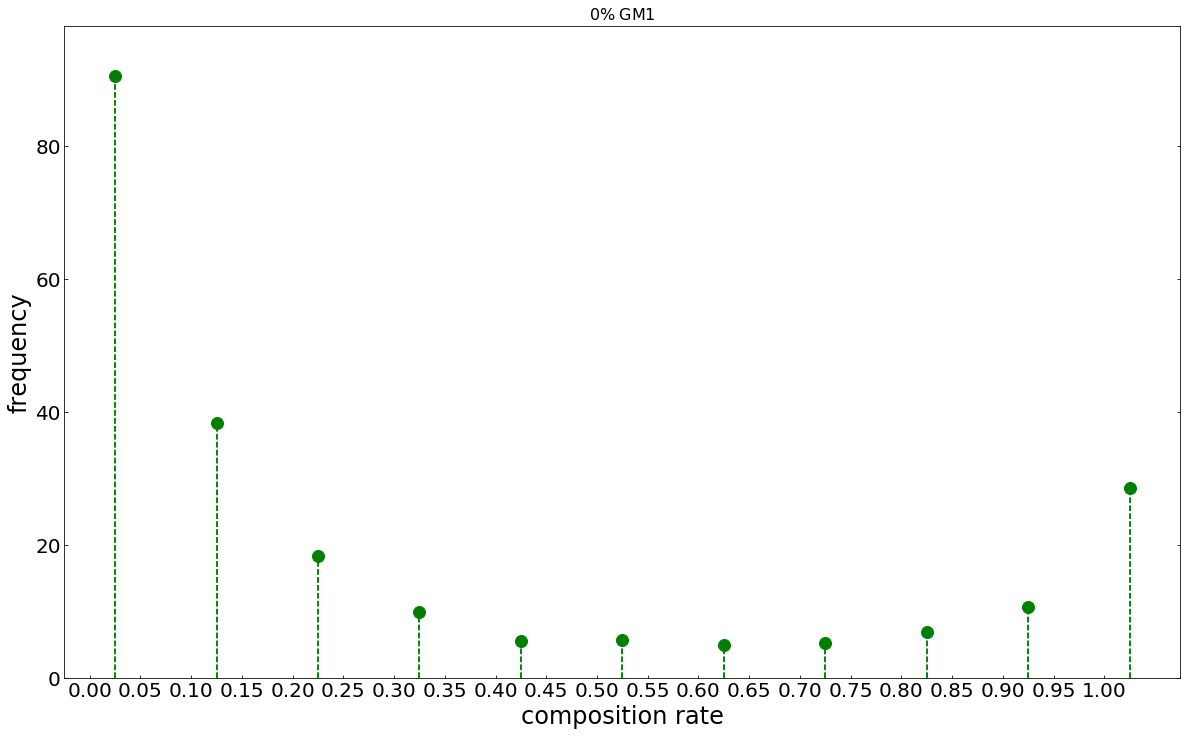

In [15]:
fig, ax=plt.subplots(figsize=(20,12))

ax.stem(rate-0.025, nb_rate, 'g--', markerfmt='go', markersize=18, basefmt=' ')
(markers)=plt.stem(rate-0.025, nb_rate, 'g--', markerfmt='go', markersize=18, basefmt=' ')
plt.setp(markers, markersize=12)

ymin = 0.0
ymax = 98
plt.ylim(ymin,ymax)

plt.xlabel('composition rate',fontsize=24)
plt.ylabel('frequency',fontsize=24)

plt.xticks(np.arange(0, 1.05, step=0.05))
ax.set_title('0$\% \; $GM1', fontsize=16)
ax.tick_params(labelsize=20)

ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

plt.savefig(path+'compo_dist'+name+'_long10_bins10.pdf', format='pdf',bbox_inches='tight')

In [17]:
print(rate)
print(nb_rate)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05]
[90.48066667 38.356      18.40133333  9.896       5.54533333  5.768
  4.97466667  5.32533333  6.90866667 10.768      28.576     ]
